In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
messages_df = pd.read_json('data/messages.json')
priority_df = pd.read_json('data/priority.json')
reputations_df = pd.read_json('data/reputations.json')
true_reputations_df = pd.read_json('data/true_reputations.json')

### Overall statistics of different fields, are there any anomalies?

In [52]:
# Overall statistics summary for numerical columns
print("Messages DataFrame Summary:")
print(messages_df.describe())
print("\nPriority DataFrame Summary:")
print(priority_df.describe())
print("\nReputations DataFrame Summary:")
print(reputations_df.describe())
print("\nTrue Reputations DataFrame Summary:")
print(true_reputations_df.describe())

# Categorical variable value counts
print("\nMessages Source Value Counts:")
print(messages_df['source'].value_counts())
print("\nMessages Protocol Value Counts:")
print(messages_df['protocol'].value_counts())
print("\nMessages Service Value Counts:")
print(messages_df['service'].value_counts())
print("\nReputations Source Value Counts:")
print(reputations_df['reputation_source'].value_counts())
print("\nTrue Reputations Reputation Source Value Counts:")
print(true_reputations_df['reputation_source'].value_counts())
print("\nTrue Reputations True Reputation Value Counts:")
print(true_reputations_df['true_reputation'].value_counts())

Messages DataFrame Summary:
                                date  response_code  load_time_seconds  \
count                         100000   98995.000000      100000.000000   
mean   2021-04-12 18:22:02.784000256     223.408202           5.267296   
min              1936-01-26 00:00:00     200.000000           0.500000   
25%              2020-12-24 00:00:00     200.000000           2.900000   
50%              2022-01-16 00:00:00     200.000000           5.280000   
75%              2023-02-05 00:00:00     200.000000           7.640000   
max              2024-02-28 00:00:00     404.000000          10.000000   
std                              NaN      51.554777           2.737244   

       domain_age_years   page_size_kb     url_length  
count      74905.000000  100000.000000  100000.000000  
mean           2.001976     275.124990      11.753110  
min            1.000000      50.000000       4.000000  
25%            1.000000     162.000000       9.000000  
50%            2.000000  

In [7]:
# URL length
messages_df['url_length'] = messages_df['url'].apply(len)

# Summary statistics for numeric fields
fields = ['load_time_seconds', 'domain_age_years', 'page_size_kb', 'url_length']
stats = messages_df[fields].describe()

# Count occurrences of each source
source_distribution = messages_df['source'].value_counts()

# Count occurrences of each response code
response_code_distribution = messages_df['response_code'].value_counts()

# Count occurrences of each protocol
protocol_distribution = messages_df['protocol'].value_counts()

# Count occurrences of redirects
redirects_distribution = messages_df['redirects'].value_counts()

# Count occurrences of each service
service_distribution = messages_df['service'].value_counts()

# Display all summary statistics
print("Summary Statistics for Fields:")
print(stats)
print("\nSource Distribution:")
print(source_distribution)
print("\nResponse Code Distribution:")
print(response_code_distribution)
print("\nProtocol Usage Distribution:")
print(protocol_distribution)
print("\nRedirects Distribution:")
print(redirects_distribution)
print("\nService Distribution:")
print(service_distribution)

Summary Statistics for Fields:
       load_time_seconds  domain_age_years   page_size_kb     url_length
count      100000.000000      74905.000000  100000.000000  100000.000000
mean            5.267296          2.001976     275.124990      11.753110
std             2.737244          0.815021     130.370858       3.622812
min             0.500000          1.000000      50.000000       4.000000
25%             2.900000          1.000000     162.000000       9.000000
50%             5.280000          2.000000     275.000000      11.000000
75%             7.640000          3.000000     388.000000      14.000000
max            10.000000          3.000000     500.000000      66.000000

Source Distribution:
source
source_3    25094
source_1    25024
source_2    25018
source_4    24864
Name: count, dtype: int64

Response Code Distribution:
response_code
200.0    80095
301.0    14935
404.0     3965
Name: count, dtype: int64

Protocol Usage Distribution:
protocol
HTTP     50095
HTTPS    49905
Na

Correlation Matrix:
                   load_time_seconds  domain_age_years  page_size_kb  \
load_time_seconds           1.000000          0.005595      0.002379   
domain_age_years            0.005595          1.000000      0.000759   
page_size_kb                0.002379          0.000759      1.000000   
url_length                 -0.000671          0.002305     -0.002368   

                   url_length  
load_time_seconds   -0.000671  
domain_age_years     0.002305  
page_size_kb        -0.002368  
url_length           1.000000  


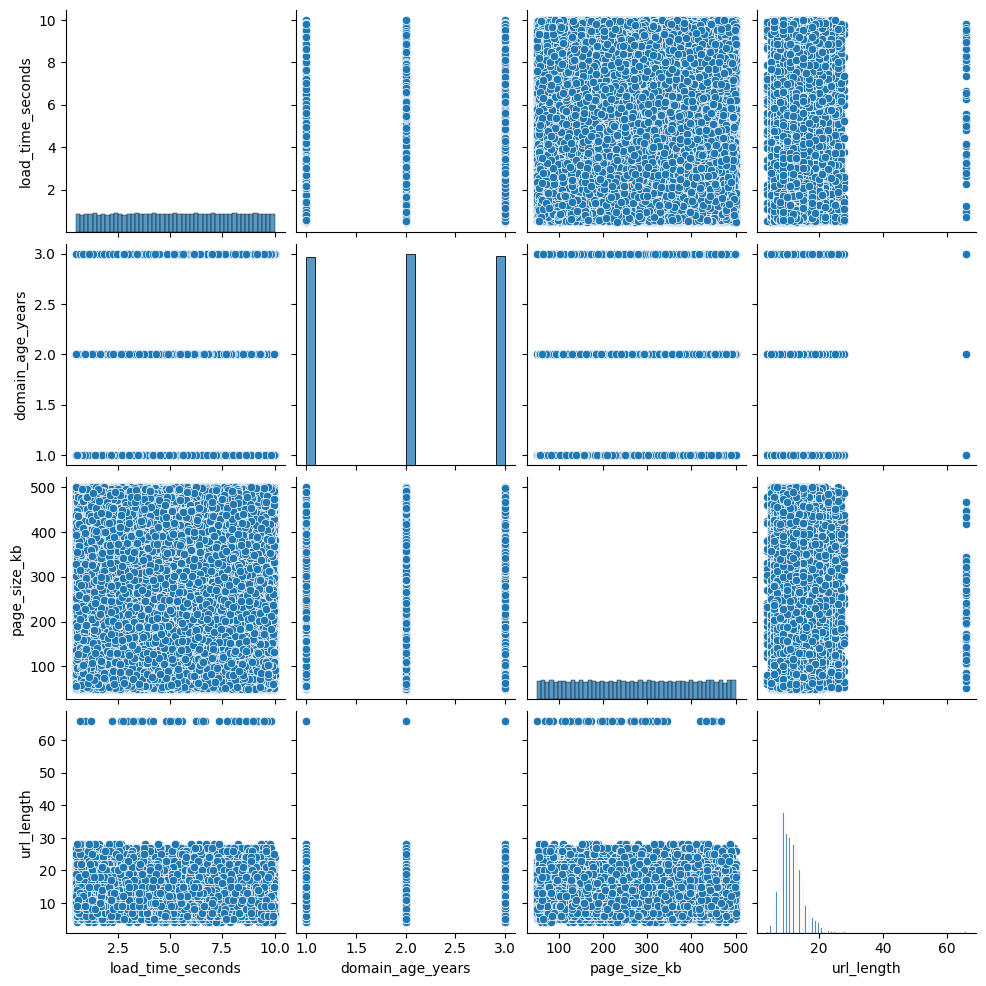

Mean Load Time by Source:
source
source_1    5.311253
source_2    5.246776
source_3    5.249171
source_4    5.261997
Name: load_time_seconds, dtype: float64
Response Code Category Value Counts:
response_code_category
Success         80095
Client Error    14935
Server Error     3965
Redirection         0
Name: count, dtype: int64


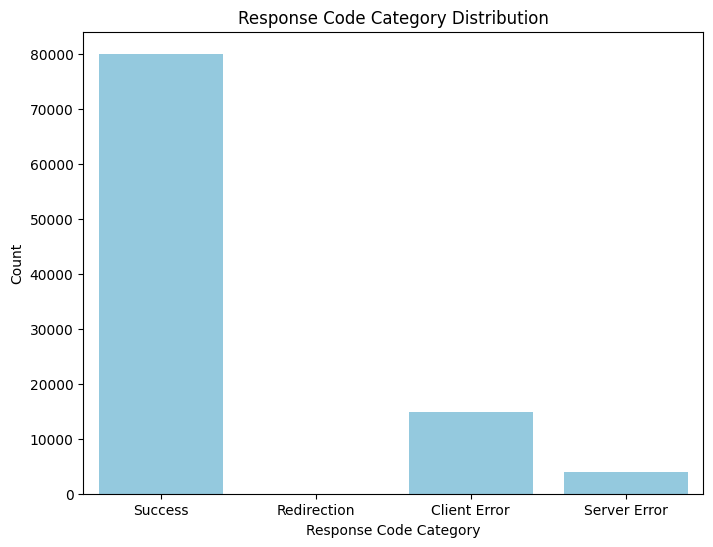

In [58]:
import numpy as np

# Correlation analysis (for numeric variables)
correlation_matrix = messages_df[['load_time_seconds', 'domain_age_years', 'page_size_kb', 'url_length']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualization (scatter plot for numeric variables)
sns.pairplot(messages_df[['load_time_seconds', 'domain_age_years', 'page_size_kb', 'url_length']])
plt.show()

# Grouping and aggregation (mean load time by source)
mean_load_time_by_source = messages_df.groupby('source')['load_time_seconds'].mean()
print("Mean Load Time by Source:")
print(mean_load_time_by_source)

# Creating a new feature, 'response code category'
messages_df['response_code_category'] = pd.cut(messages_df['response_code'], bins=[0, 200, 300, 400, np.inf], labels=['Success', 'Redirection', 'Client Error', 'Server Error'])
print("Response Code Category Value Counts:")
print(messages_df['response_code_category'].value_counts())

# Visualization for response code category
plt.figure(figsize=(8, 6))
sns.countplot(data=messages_df, x='response_code_category', color='skyblue')
plt.title("Response Code Category Distribution")
plt.xlabel("Response Code Category")
plt.ylabel("Count")
plt.show()

### Inspecting data further and finding any anomalies

Checking redirects

Redirect Counts by Service:
service
service_2    4605
service_3    4437
service_1    4434
service_4    1459
Name: count, dtype: int64


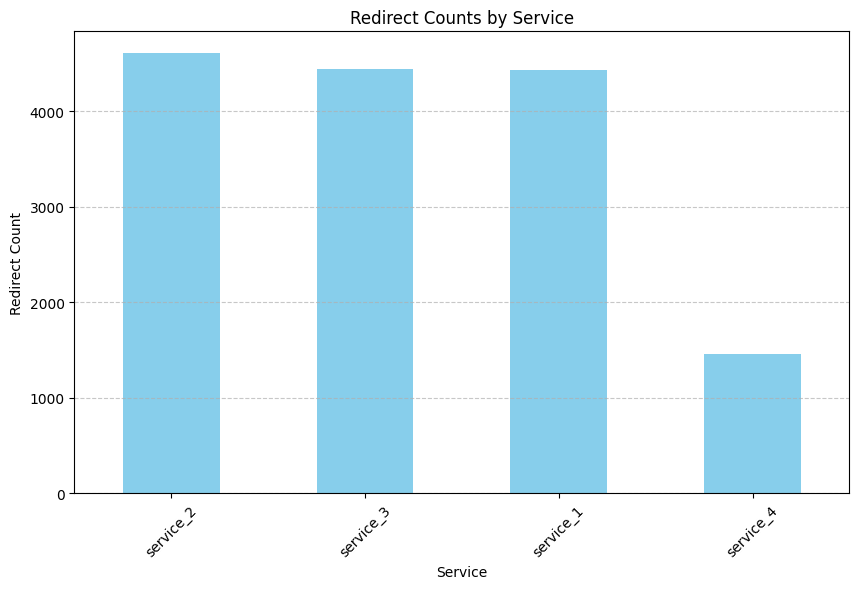

In [127]:
# Filter the Df for entries where the response code indicates a redirect
redirect_responses = [301.0, 302.0]
redirect_counts_by_service = messages_df[messages_df['response_code'].isin(redirect_responses)]['service'].value_counts()

# Display the counts
print("Redirect Counts by Service:")
print(redirect_counts_by_service)

# Visualize the counts of redirects for each service
plt.figure(figsize=(10, 6))
redirect_counts_by_service.plot(kind='bar', color='skyblue')
plt.title('Redirect Counts by Service')
plt.xlabel('Service')
plt.ylabel('Redirect Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
# Filter the Df to include only rows where redirects are lists
redirects_lists_df = messages_df[messages_df['redirects'].apply(lambda x: isinstance(x, list))]

# Extract the destinations of redirects for each service
redirect_destinations_by_service = redirects_lists_df.groupby('service')['redirects'].apply(lambda x: [dest for sublist in x for dest in sublist])

# Count the occurrences of each destination for each service
redirect_destinations_counts_by_service = redirect_destinations_by_service.apply(lambda x: pd.Series(x).value_counts() if len(x) > 0 else None)

# Display the counts of redirect destinations for each service
print("Redirect Destinations Counts by Service:")
print(redirect_destinations_counts_by_service)

Redirect Destinations Counts by Service:
              True  myntra.com  google.bg  ringcentral.com  hrzn-nxt.com  \
service                                                                    
service_1  11808.0        18.0       17.0             16.0          16.0   
service_2  12068.0        14.0        7.0              9.0          10.0   
service_3  12056.0         8.0        3.0              6.0           9.0   
service_4   4101.0         3.0        3.0              6.0           NaN   

           lowes.com  nih.gov  google.ht  starplus.com  leparisien.fr  ...  \
service                                                                ...   
service_1       16.0     15.0       15.0          15.0           15.0  ...   
service_2        7.0      8.0        8.0          13.0            7.0  ...   
service_3        5.0      7.0        4.0           7.0            9.0  ...   
service_4        2.0      3.0        2.0           2.0            2.0  ...   

           mega.nz  notion.so  t-

Checking response codes

Response Code Distribution:
response_code
200.0    80095
301.0    14935
404.0     3965
Name: count, dtype: int64


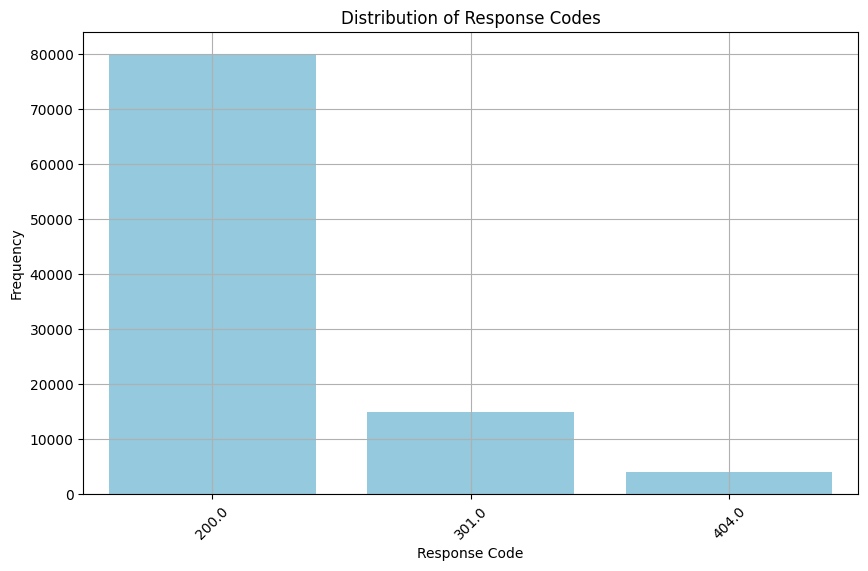

In [57]:
# Count occurrences of each response code
response_code_distribution = messages_df['response_code'].value_counts()

# Display the distribution
print("Response Code Distribution:")
print(response_code_distribution)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=response_code_distribution.index, y=response_code_distribution.values, color='skyblue')
plt.title('Distribution of Response Codes')
plt.xlabel('Response Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Checking domain age

Summary Statistics for Domain Ages:
count    74905.000000
mean         2.001976
std          0.815021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: domain_age_years, dtype: float64


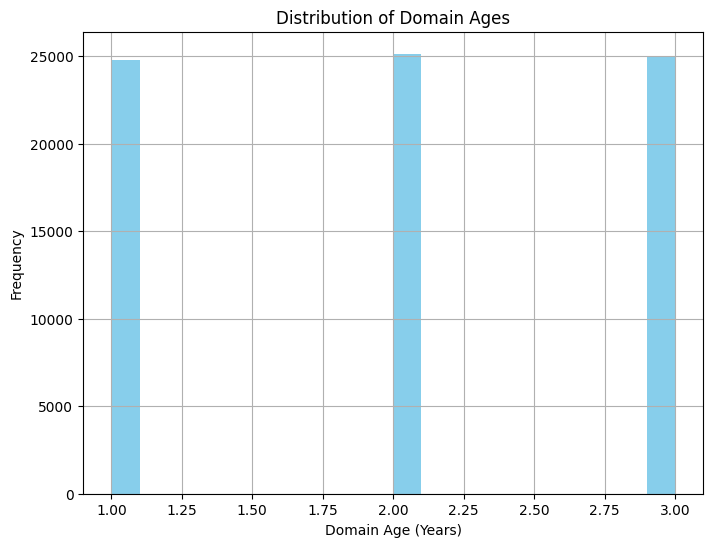

In [100]:
# Summary statistics for domain ages
domain_age_stats = messages_df['domain_age_years'].describe()
print("Summary Statistics for Domain Ages:")
print(domain_age_stats)

# Visualize the distribution of domain ages
plt.figure(figsize=(8, 6))
plt.hist(messages_df['domain_age_years'], bins=20, color='skyblue')
plt.title('Distribution of Domain Ages')
plt.xlabel('Domain Age (Years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Checking reputations

Summary Statistics of Reputation Scores for reputations_df:
count    90000.000000
mean        50.040756
std         29.115910
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: reputation_score, dtype: float64


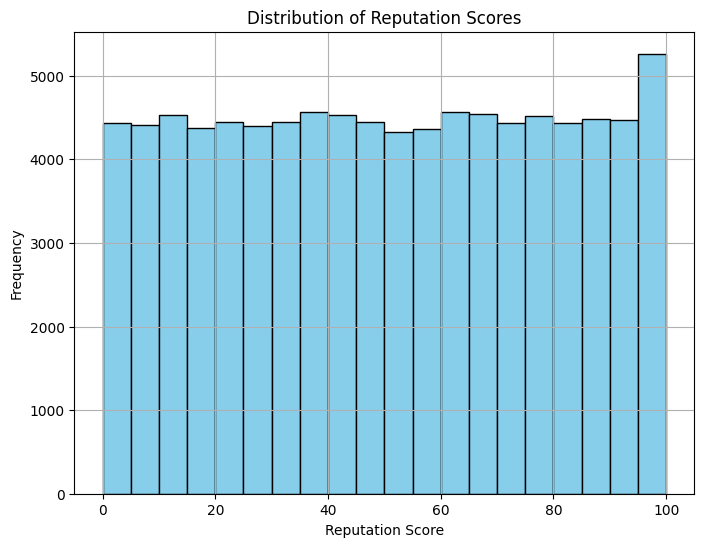

In [101]:
# Summary statistics of reputation scores for reputations_df
reputation_score_stats = reputations_df['reputation_score'].describe()
print("Summary Statistics of Reputation Scores for reputations_df:")
print(reputation_score_stats)

# Visualize the distribution of reputation scores
plt.figure(figsize=(8, 6))
plt.hist(reputations_df['reputation_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Reputation Scores')
plt.xlabel('Reputation Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Checking true reputations

Counts of True Reputations:
true_reputation
clean       55902
phishing     9460
unknown      9407
scam         9307
malware      9258
Name: count, dtype: int64


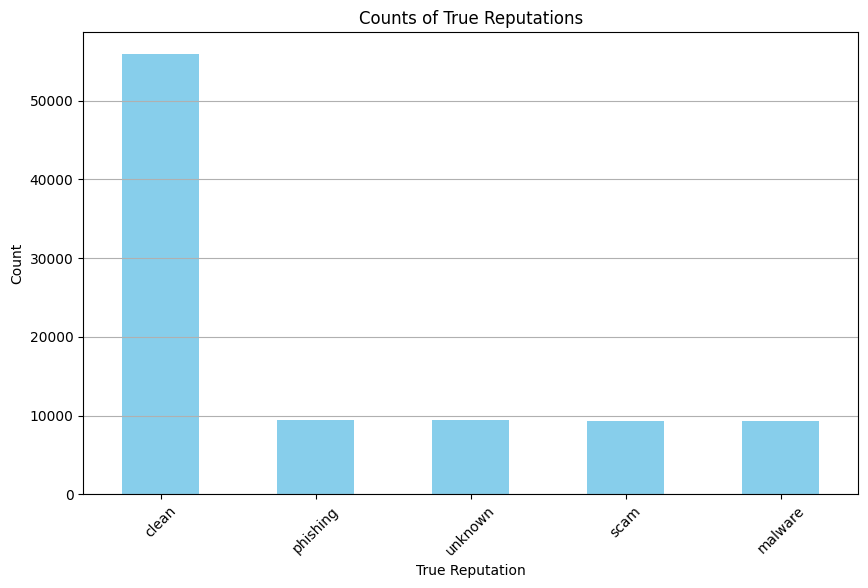

In [44]:
# Count occurrences of each true reputation Df
true_reputation_counts = true_reputations_df['true_reputation'].value_counts()

# Display the counts
print("Counts of True Reputations:")
print(true_reputation_counts)

# Visualize the true reputation occurrences
plt.figure(figsize=(10, 6))
true_reputation_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of True Reputations')
plt.xlabel('True Reputation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Counts of True Reputations:
true_reputation
clean       55902
phishing     9460
unknown      9407
scam         9307
malware      9258
Name: count, dtype: int64


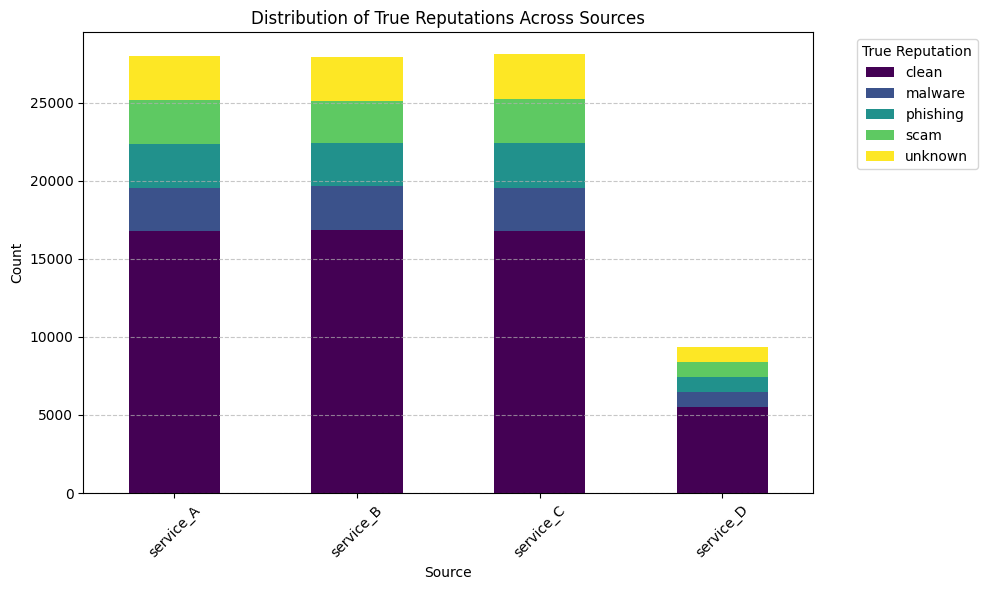

In [73]:
# Merging sources with reputation values
# Count occurrences of each true reputation
true_reputation_counts = true_reputations_df['true_reputation'].value_counts()

# Display the counts
print("Counts of True Reputations:")
print(true_reputation_counts)

# Group data by source and calculate the count of true reputations for each source
true_reputation_counts_by_source = true_reputations_df.groupby(['reputation_source', 'true_reputation']).size().unstack(fill_value=0)

# Visualize the distribution of true reputations across different sources
fig, ax = plt.subplots(figsize=(10, 6))
true_reputation_counts_by_source.plot(kind='bar', stacked=True, cmap='viridis', ax=ax)
ax.set_title('Distribution of True Reputations Across Sources')
ax.set_xlabel('Source')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='True Reputation', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Checking urls and page sizes

Summary Statistics for URL Lengths:
count    100000.000000
mean         11.753110
std           3.622812
min           4.000000
25%           9.000000
50%          11.000000
75%          14.000000
max          66.000000
Name: url_length, dtype: float64

Summary Statistics for Page Sizes:
count    100000.000000
mean        275.124990
std         130.370858
min          50.000000
25%         162.000000
50%         275.000000
75%         388.000000
max         500.000000
Name: page_size_kb, dtype: float64


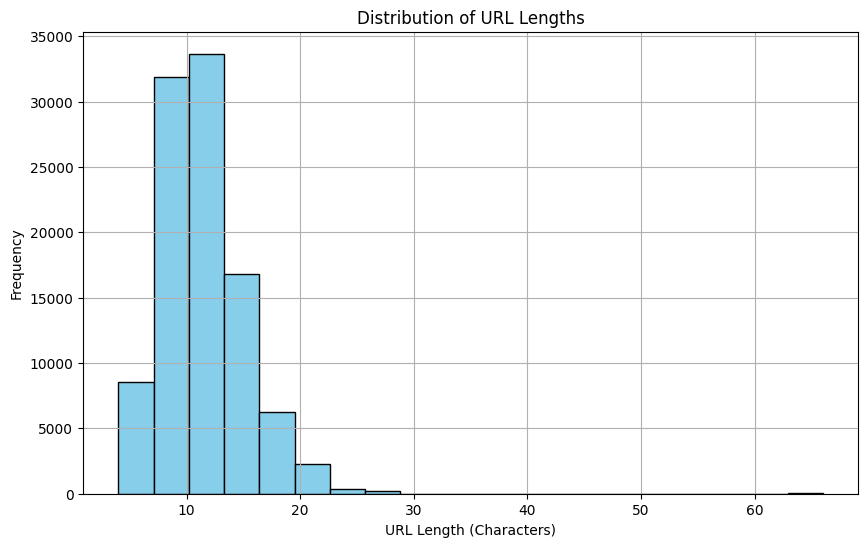

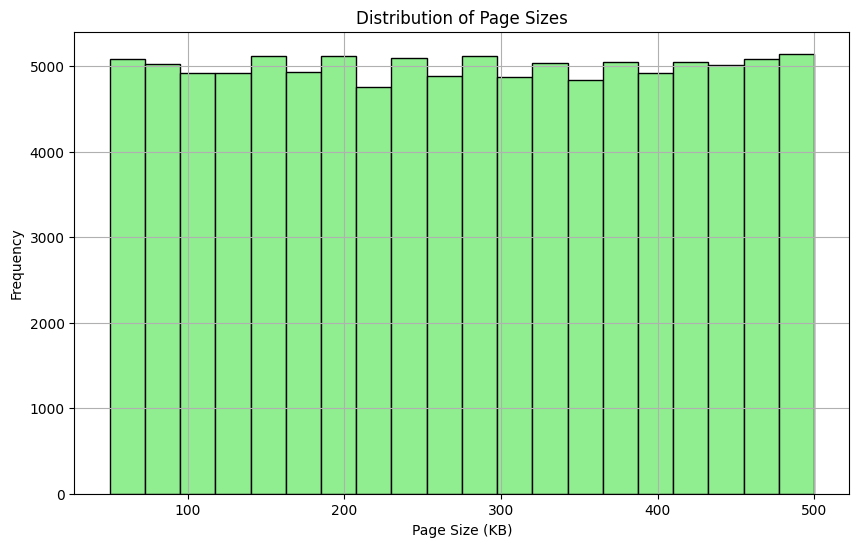

In [87]:
# Summary statistics for URL lengths
url_length_stats = messages_df['url_length'].describe()

# Summary statistics for page sizes
page_size_stats = messages_df['page_size_kb'].describe()

print("Summary Statistics for URL Lengths:")
print(url_length_stats)
print("\nSummary Statistics for Page Sizes:")
print(page_size_stats)

# Visualize the distribution of URL lengths
plt.figure(figsize=(10, 6))
plt.hist(messages_df['url_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of URL Lengths')
plt.xlabel('URL Length (Characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize the distribution of page sizes
plt.figure(figsize=(10, 6))
plt.hist(messages_df['page_size_kb'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Page Sizes')
plt.xlabel('Page Size (KB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Which service deals with the most load time?

service
service_2    30118
service_3    29938
service_1    29753
service_4    10191
Name: count, dtype: int64


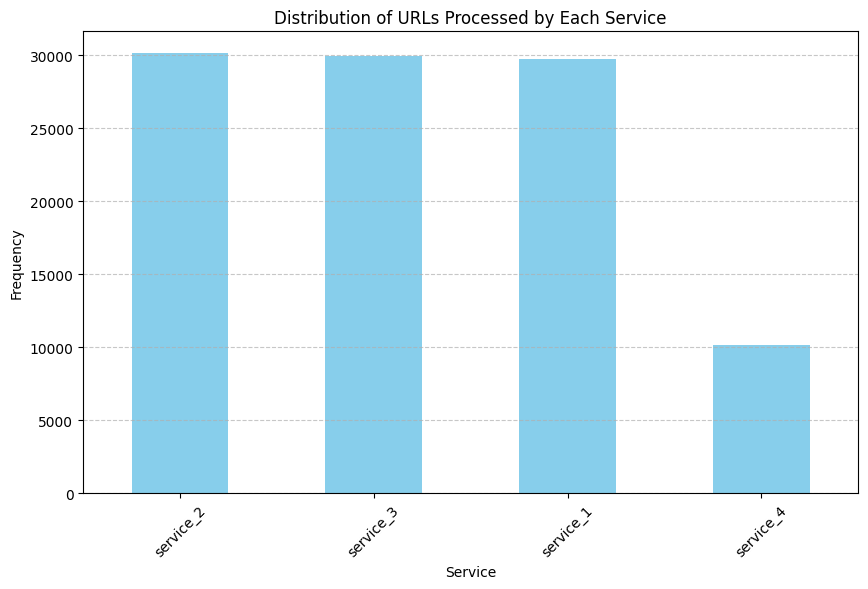

In [89]:
# Calculate frequency of URLs processed by each service
service_counts = messages_df['service'].value_counts()
print(service_counts)

# Visualize the distribution of URLs processed by each service
plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of URLs Processed by Each Service')
plt.xlabel('Service')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [107]:
# Calculate summary statistics for load time by service
load_time_stats_by_service = messages_df.groupby('service')['load_time_seconds'].describe()

# Display the summary statistics
print("Load Time Statistics by Service:")
print(load_time_stats_by_service)

Load Time Statistics by Service:
             count      mean       std  min   25%   50%   75%   max
service                                                            
service_1  29753.0  5.274654  2.737469  0.5  2.90  5.31  7.65  10.0
service_2  30118.0  5.273935  2.745212  0.5  2.90  5.27  7.65  10.0
service_3  29938.0  5.260939  2.733731  0.5  2.90  5.28  7.61  10.0
service_4  10191.0  5.244869  2.723522  0.5  2.88  5.26  7.64  10.0


In [108]:
# Calculate total load time for each service
total_load_time_by_service = messages_df.groupby('service')['load_time_seconds'].sum()
print("Total Load Time by Service:")
print(total_load_time_by_service)


Total Load Time by Service:
service
service_1    156936.79
service_2    158840.38
service_3    157501.99
service_4     53450.46
Name: load_time_seconds, dtype: float64


In [109]:
# Calculate average load time per URL for each service
average_load_time_per_url = total_load_time_by_service / service_counts
print("Average Load Time per URL by Service:")
print(average_load_time_per_url)


Average Load Time per URL by Service:
service
service_1    5.274654
service_2    5.273935
service_3    5.260939
service_4    5.244869
dtype: float64


In [110]:
# Identify the service with the highest average load time per URL
highest_avg_load_time_service = average_load_time_per_url.idxmax()
print("Service with the Highest Average Load Time per URL:", highest_avg_load_time_service)

Service with the Highest Average Load Time per URL: service_1


### Which source has the most incorrect reputations?

Counts of Incorrect Reputations by Source:
reputation_source
source_2    27290
source_1    27042
source_3    26601
source_4     9067
Name: count, dtype: int64


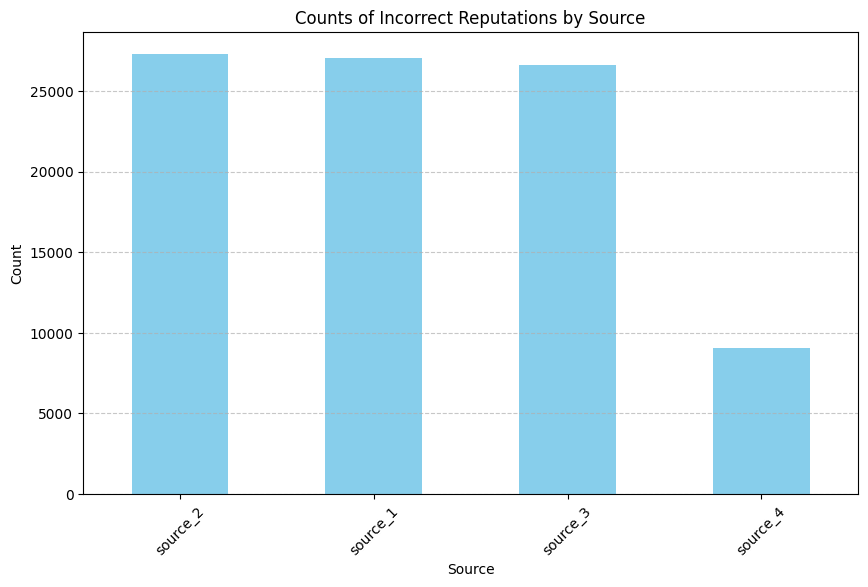

In [115]:

# Merge the reputations_df with true_reputations_df on the reputation_source column
merged_reputations = pd.merge(reputations_df, true_reputations_df, on='reputation_source', how='left')

# Check for incorrect reputations
incorrect_reputations = merged_reputations[merged_reputations['reputation_score'] != merged_reputations['true_reputation']]

# Count occurrences of incorrect reputations for each source
incorrect_reputation_counts = incorrect_reputations['reputation_source'].value_counts()

# Display the counts
print("Counts of Incorrect Reputations by Source:")
print(incorrect_reputation_counts)

# Visualize the counts of incorrect reputations by source
plt.figure(figsize=(10, 6))
merged_reputations['reputation_source'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Counts of Incorrect Reputations by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Which services causes the most redirects?

Response Code Distribution:
response_code
200.0    80095
301.0    14935
404.0     3965
Name: count, dtype: int64


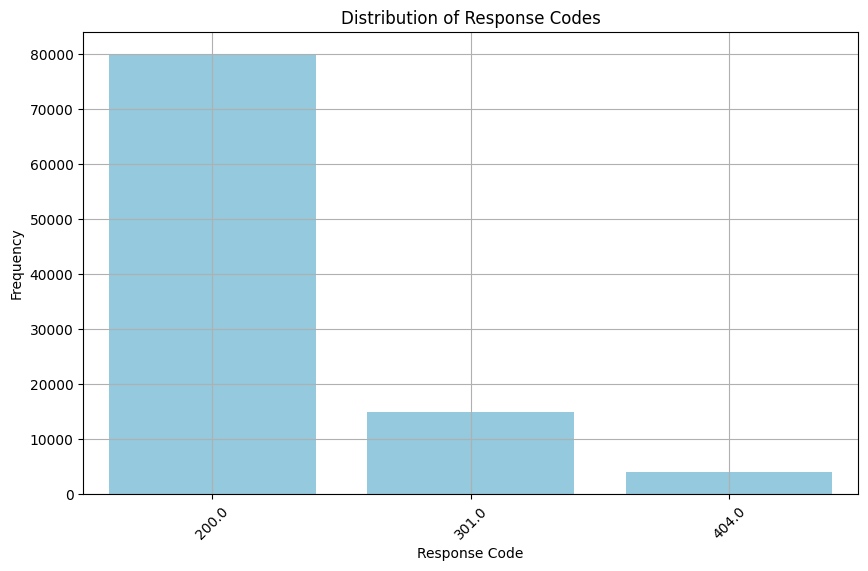

In [129]:
# Count occurrences of each response code
response_code_distribution = messages_df['response_code'].value_counts()

# Display the distribution
print("Response Code Distribution:")
print(response_code_distribution)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=response_code_distribution.index, y=response_code_distribution.values, color='skyblue')
plt.title('Distribution of Response Codes')
plt.xlabel('Response Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Redirect Counts by Service:
service
service_2    4605
service_3    4437
service_1    4434
service_4    1459
Name: count, dtype: int64


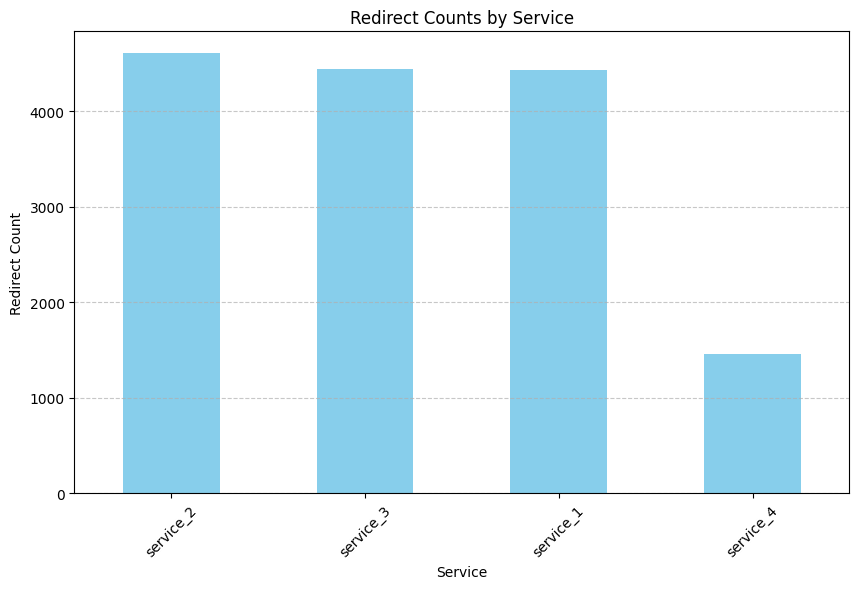

In [128]:
# Reusing previous findings
# Filter the DataFrame for entries where the response code indicates a redirect
redirect_responses = [301.0, 302.0]
redirect_counts_by_service = messages_df[messages_df['response_code'].isin(redirect_responses)]['service'].value_counts()

# Display the counts
print("Redirect Counts by Service:")
print(redirect_counts_by_service)

# Visualize the counts of redirects for each service
plt.figure(figsize=(10, 6))
redirect_counts_by_service.plot(kind='bar', color='skyblue')
plt.title('Redirect Counts by Service')
plt.xlabel('Service')
plt.ylabel('Redirect Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Bonus

### Sometimes, information about the URL might be missing, for example domain age, response codes. Can you think of and implement a solution to fill the missing data?

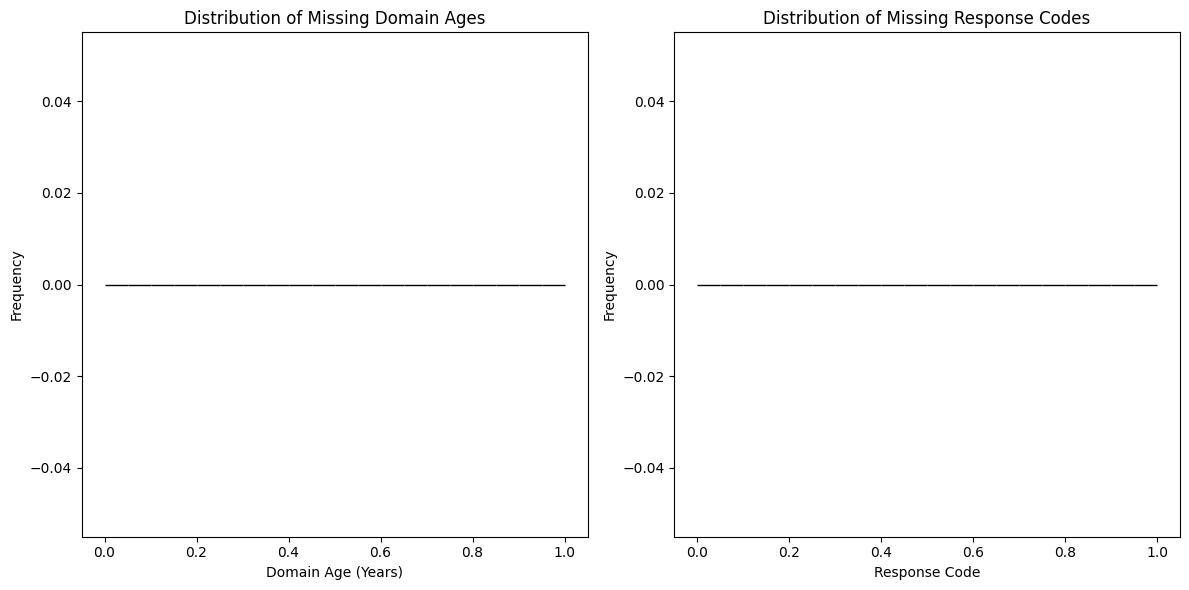

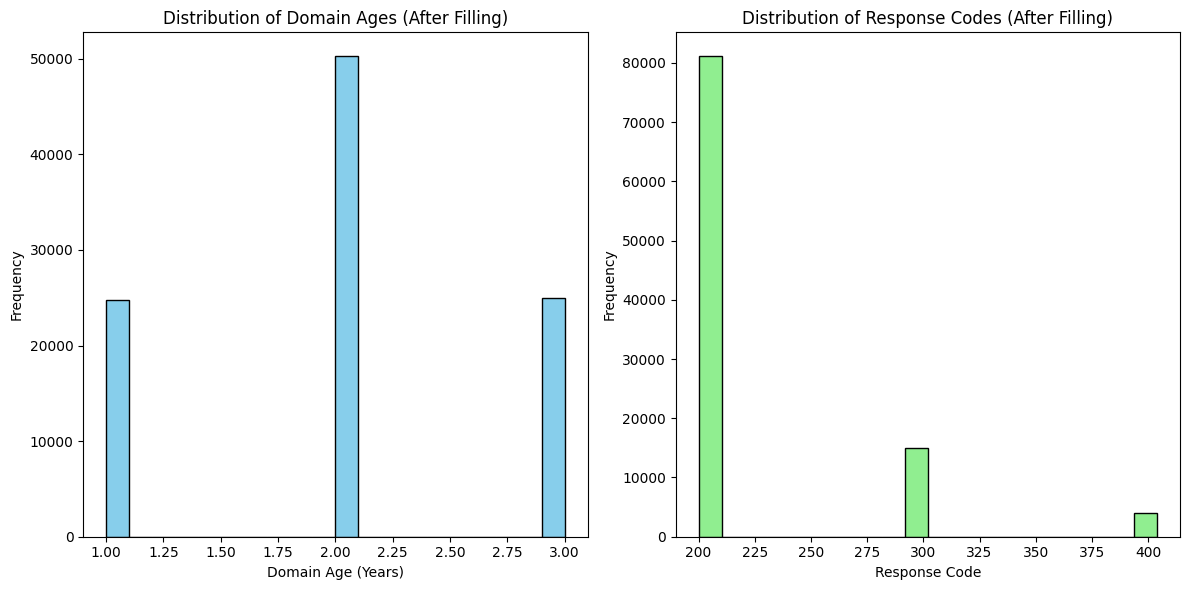

In [139]:
# Fill missing values in 'domain_age_years' with median
median_domain_age = messages_df['domain_age_years'].median()
messages_df['domain_age_years'] = messages_df['domain_age_years'].fillna(median_domain_age)

# Fill missing values in 'response_code' with most common response code
most_common_response_code = messages_df['response_code'].mode()[0]
messages_df['response_code'] = messages_df['response_code'].fillna(most_common_response_code)

# Before filling missing data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(messages_df[messages_df['domain_age_years'].isna()]['domain_age_years'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Missing Domain Ages')
plt.xlabel('Domain Age (Years)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(messages_df[messages_df['response_code'].isna()]['response_code'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Missing Response Codes')
plt.xlabel('Response Code')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# After filling missing data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(messages_df['domain_age_years'].fillna(messages_df['domain_age_years'].median()), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Domain Ages (After Filling)')
plt.xlabel('Domain Age (Years)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(messages_df['response_code'].fillna(messages_df['response_code'].median()), bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Response Codes (After Filling)')
plt.xlabel('Response Code')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Same URL can be consumed more than once and have different information about it - different date, reputation and so on. Can you determine the final information about the URL based on the time and priority of the message? 

### For example, test.com was consumed 3 times, each time it had different reputation & date, naturally, the final reputation will be the one with the latest date. But if the first message had a higher priority than the last two - the final information is from the first message.


### It might happen that there is information missing in the first message but present in second or the third message, so the final information will be the first message with an updates from the second and the third.

                                        id             url  \
0     3b6f211f-23a0-4cae-8bc2-a988f5a94f00        0hpx.xyz   
1     ca680b4a-60ba-482e-8c77-c6ab34698686        10086.cn   
2     ab55cb81-0e06-4043-9237-23628bc74e70        1337x.to   
3     bca3f8b7-66b1-4f24-9e25-f71a7bda1744         163.com   
4     31a5f7da-8181-44b7-a6dc-ba4998c07e14        1drv.com   
...                                    ...             ...   
2163  d91d8893-2060-463c-89a1-da4bbbf693e1       zopim.com   
2164  bd20d706-f461-47e4-9d52-81dafae35ea7        zorox.to   
2165  bdc1923c-bb4c-434c-9206-71ad2123e05d        zqtk.net   
2166  389bbf51-1f34-4db7-a4ec-6df0a8cc798c     zscaler.net   
2167  72ea40d8-3b0e-4b87-8b8d-10cf80490000  zscalertwo.net   

                     date    source protocol response_code load_time_seconds  \
0     2021-11-22 00:00:00  source_2     HTTP         200.0              3.72   
1     2023-06-07 00:00:00  source_3    HTTPS         200.0              6.88   
2     2024-02-1

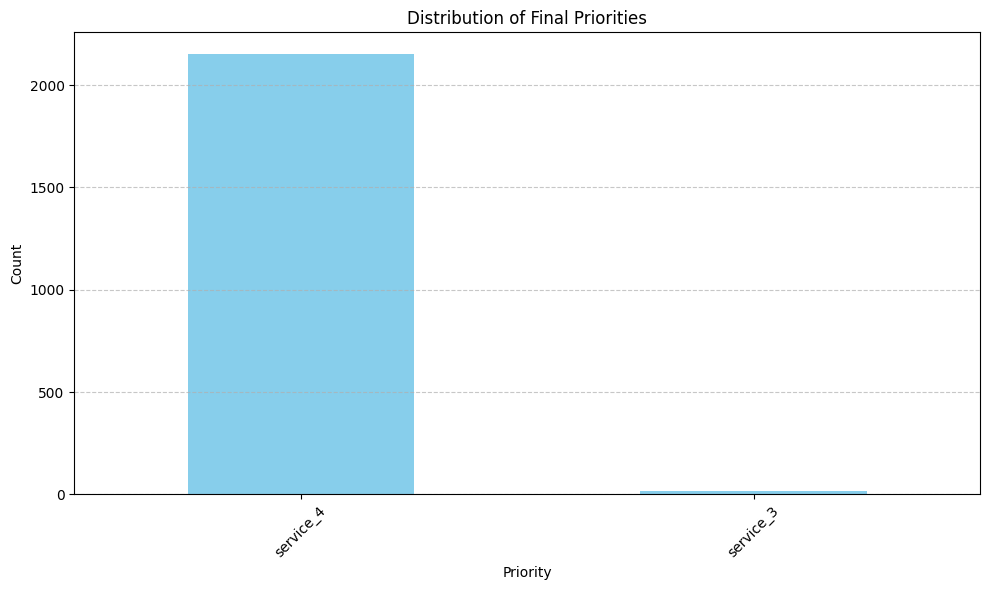

In [156]:
# Merge Messages and Priority DataFrames
merged_df = messages_df.merge(priority_df, on='id')

# Group by URL
url_groups = merged_df.groupby('url')

# Initialize an empty list to store the final information
final_info_list = []

# Iterate over each URL group
for url, group_df in url_groups:
    # If there are multiple messages for the same URL
    if len(group_df) > 1:
        # Select the message with the highest priority
        max_priority_idx = group_df['priority'].idxmax()
        final_info_list.append(group_df.loc[max_priority_idx])
    else:
        # If there's only one message, directly append it to the final list
        final_info_list.append(group_df.iloc[0])

# Create the final information Df by concatenating the list of DataFrames
final_info_df = pd.concat(final_info_list, axis=1).T

# Reset index of the final Df
final_info_df.reset_index(drop=True, inplace=True)

# Display the final information Df
print(final_info_df)


# Visualize the distribution of final priorities
plt.figure(figsize=(10, 6))
final_priority_counts = final_info_df['priority'].value_counts()

print('Priorities count')
print(final_priority_counts)

final_priority_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Final Priorities')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()